*******q1 part 1********
*******1000 units, dropout prob = 0 ********
init layer [10, 10]
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)


/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
wlistArr  (2,)
self.learn

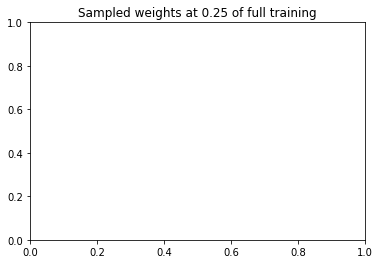

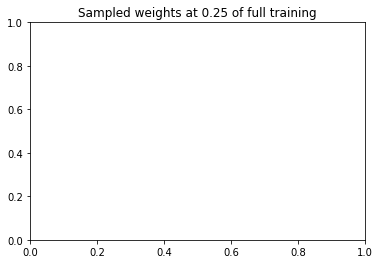

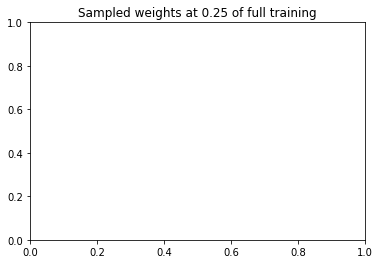

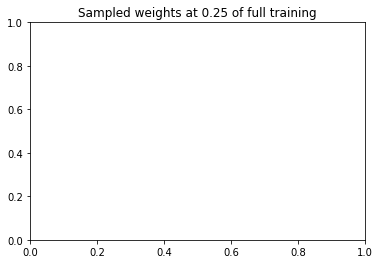

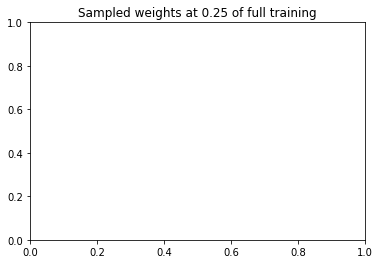

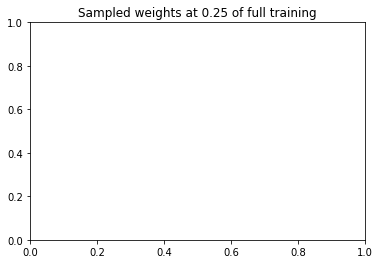

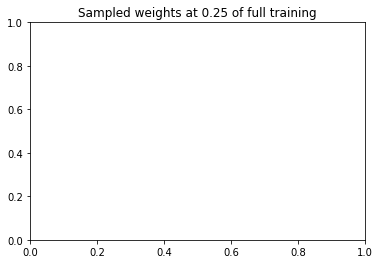

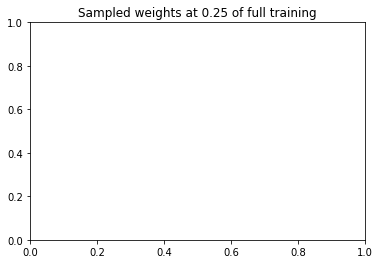

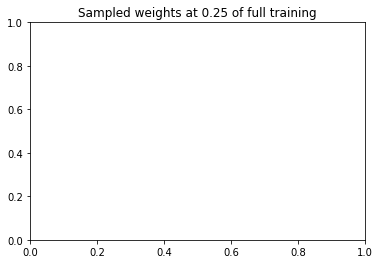

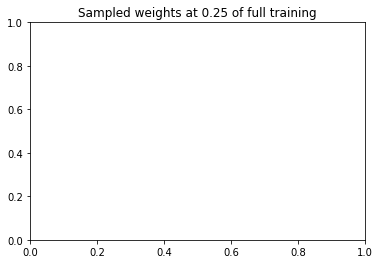

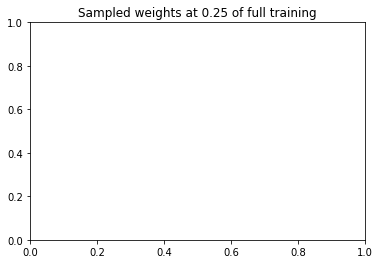

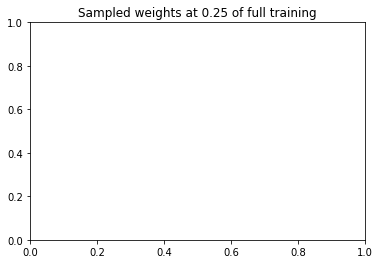

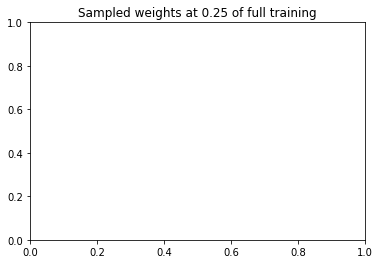

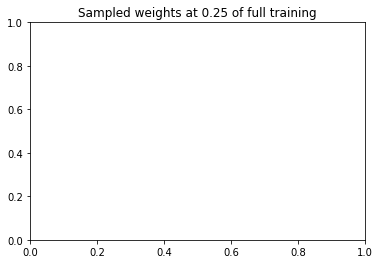

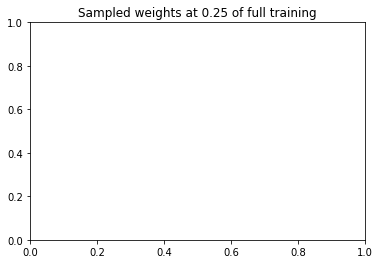

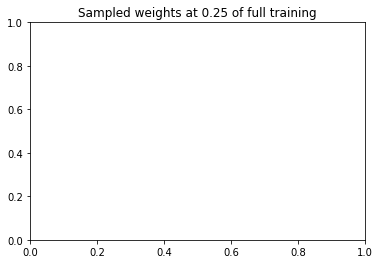

In [ ]:
import tensorflow as tf
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import math


def hyperParamGen():
    #random sampes using numpy
    logLearningRate = np.random.uniform(-7.5, -4.5)
    print("logLearningRate", logLearningRate)
    learningRate = np.exp(logLearningRate)
    print("learningRate", learningRate)
    numLayers = np.random.random_integers(1, 5)
    print("numLayers", numLayers)
    numHiddenUnits = np.random.random_integers(100, 500)
    print("numHiddenUnits", numHiddenUnits)
    logWeightedDecay = np.random.uniform(-9, -6)
    print("logWeightedDecay", logWeightedDecay)
    weightedDecay = np.exp(logWeightedDecay)
    print("weightedDecay", weightedDecay)
    dropOut = np.random.random_integers(0, 1) # 0 or 1
    print("dropOut", dropOut)
    
    return learningRate, numLayers, numHiddenUnits, weightedDecay, dropOut

def convertTarget(targetValues):
    numClasses = np.max(targetValues) + 1
    return np.eye(numClasses)[targetValues]

class loadData:
    def __init__(self):
        self.flatten = True
        self.addOnes = False
        
        self.data_path = '/Users/vikuo/Documents/GitHub/ece521/assi/A3/notMNIST.npz'
    def arrFlatten(self, arr):
        '''
        type np array
        '''
        dataDim1, dum1, dum2 = arr.shape
        dum_sq = dum1 * dum2
        arr = np.reshape(arr, [ dataDim1 ,dum_sq ])
        return arr   
    '''
    def convertTarget(self, targetValues):
        numClasses = np.max(targetValues) + 1
        return np.eye(numClasses)[targetValues]
    '''
    def loadNumData(self):
        with np.load(self.data_path) as data:
            Data, Target = data ["images"], data["labels"]
            np.random.seed(521)
            randIndx = np.arange(len(Data))
            np.random.shuffle(randIndx)
            Data = Data[randIndx]/255.
            
            if self.flatten:
                Data = self.arrFlatten(Data)
            
            Target = Target[randIndx]
            trainData, trainTarget = Data[:15000], Target[:15000]
            validData, validTarget = Data[15000:16000], Target[15000:16000]
            testData, testTarget = Data[16000:], Target[16000:]
            
            trainTarget = convertTarget(trainTarget)
            validTarget = convertTarget(validTarget)
            testTarget = convertTarget(testTarget)
 
        return trainData, trainTarget, validData, validTarget, testData, testTarget

class BatchSampler(object):
    '''
    A (very) simple wrapper to randomly sample batches without replacement.
    '''
    
    def __init__(self, data, targets, batch_size):
        self.num_points = data.shape[0]
        self.features = data.shape[1]
        self.data = data
        self.targets = targets
        self.batch_size = batch_size
        self.indices = np.arange(self.num_points)

    def random_batch_indices(self, m=None):
        if m is None:
            indices = np.random.choice(self.indices, self.batch_size, replace=False)
        else:
            indices = np.random.choice(self.indices, m, replace=False)
        return indices 

    def get_batch(self, m=None):
        '''
        Get a random batch without replacement from the dataset.
        If m is given the batch will be of size m. 
        Otherwise will default to the class initialized value.
        '''
        indices = self.random_batch_indices(m)
        X_batch = np.take(self.data, indices, 0)
        y_batch = self.targets[indices]
        return X_batch, y_batch


class neuralNetwork:
    # these are for testing only
    def __init__(self, _learningRate = 0.005, _learningRateArr = [0.05], 
                 _numLayers = [1000], _weightedDecay = 3e-4, _dropOut = 0, _epochIter = 20):
        # learningRate, numLayers, numHiddenUnits, weightedDecay, dropOut
        self.learningRate = _learningRate
        self.learningRateArr = _learningRateArr
        self.numLayers = _numLayers # number of units in each layer
        self.numLayers.append(10)
        print("init layer", self.numLayers)
        self.weightedDecay = _weightedDecay
        self.dropOut = _dropOut
        self.dropOutProb = 0.5
        self.epochIter = _epochIter 
        
        
        # default, no arg taken
        self.numPixel = 784 
        self.numClass = 10
        self.batchSize = 500
        
    def buildLayer(self, _inputTensor, _numUnits):
        '''
        input:
            #feed# _inputTensor S = theta(Xprev)from the prev layer
            _numUnits is the num of neurons in this layer
    
        intermediate xavierInit:
            W is initialized as Xavier
            W is input.shape[1] by num units
    
        output:
        weighted sum of inputs
    
        '''
        # zero mean independent Gaussians whose variance is 3/(#input + #outputs)  
        dim1 = _inputTensor.get_shape().as_list()[1]
        

        
        #Xavier
        #W = tf.get_variable("W", shape = [dim1, _numUnits], initializer=tf.contrib.layers.xavier_initializer())
        variance = 3.0 / (dim1 + _numUnits)
        W = tf.Variable(tf.truncated_normal(shape = [dim1, _numUnits],  stddev = math.sqrt(variance)))
        #b = tf.Variable(0.0, name='biases')
        b = tf.Variable(tf.zeros([_numUnits]), name = 'biases')

        
        #print("W", dim1, _numUnits)
        #print("X shape", _inputTensor.get_shape().as_list())
        X = tf.matmul(tf.cast(_inputTensor, dtype = tf.float32), W) + b
    
        #X = tf.add(X, b)
        #print("X in layer", X)
        regTerm = tf.multiply( tf.constant(0.50, dtype = tf.float32),\
                        tf.multiply(tf.constant(self.weightedDecay,dtype = tf.float32), tf.reduce_mean(tf.square(W))))
        
        tf.add_to_collection("layerW", W)
        tf.add_to_collection("layerReg", regTerm)

        return X
    
    
        
        
    def accuracy(self, y_hat, target):
        #TAKEN FROM last assignment
        
        target = tf.cast(target, dtype = tf.float32)
        correctCases = tf.equal(tf.argmax(y_hat, 1), tf.argmax(target, 1))
        accuracy = tf.reduce_mean(tf.cast(correctCases, dtype="float"))
        return accuracy #.eval()
    
    def classificationError(self, y_hat, target):
        target = tf.cast(target, dtype = tf.float32)
        correctCases = tf.equal(tf.argmax(y_hat, 1), tf.argmax(target, 1))
        
        error = 1 - tf.reduce_mean(tf.cast(correctCases, dtype="float"))
        return error

    
    def buildNet(self):
        '''
        input: 
            number of hidden units #in the class def
            data #feed
        output:
            predicted labels
        '''
                
        X = tf.placeholder(tf.float32, shape=[None, self.numPixel], name='dataX')
        y_target = tf.placeholder(tf.float32, shape=[None, self.numClass], name='targetY')

        X_prev = X #tf.convert_to_tensor(X)
        for numUnits in self.numLayers: #numLayers is an array of num hidden units            
            X_curr = self.buildLayer(X_prev, numUnits)
            #print("X_curr", X_curr)
            S_curr = tf.nn.relu(X_curr)
            X_prev = S_curr
            if self.dropOut:
                X_prev = tf.nn.dropout(X_prev, self.dropOutProb)
        
        y_hat = X_curr
        
        crossEntropyErrorCurr = tf.reduce_mean(
                tf.nn.softmax_cross_entropy_with_logits(logits = y_hat, labels = y_target))
        
        regTermSum = sum(tf.get_collection("regTerm"))
        regTermSum = tf.cast(regTermSum, dtype = tf.float32)
        #print("regTermsum", regTermSum)
        #print("crossEntropyError Curr", crossEntropyErrorCurr)
        
        totalLoss = tf.add(regTermSum , crossEntropyErrorCurr)
        
        optimizer = tf.train.AdamOptimizer(learning_rate = self.learningRate)
        train = optimizer.minimize(loss=totalLoss)
        accuracyTerm = self.accuracy(y_hat, y_target)
        classErrTerm = self.classificationError(y_hat, y_target)
        W = tf.get_collection("layerW")
        
        # return totalLoss also??
        return W, X, y_hat, y_target, crossEntropyErrorCurr, accuracyTerm, classErrTerm, train   #final prediction
    
        
        
        
    def plotFig(self, _dim, y , addInfo, title="default", xLabel="epoch", yLabel="yLabel", plotLabel ="plotLabel", _num =1 ):
        x = np.linspace(0, _dim, num=_dim)
        y = np.array(y)
        print("$$$$$$$$$$$$$$$ in plot fig$$$$$$$$$$$$$$$$$")
        print(y.shape)
        plt.figure(_num)
        plt.title(title)
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        for i in range(y.shape[0]):
            #print(y.shape[0])
            #print("x", x)
            #print("y", y[i])
            plt.plot(x, y[i], label = plotLabel + str(addInfo[i]))
        
        plt.legend()
        plt.savefig( title + str(_num) + ".png")
        plt.close()
        plt.clf()
        
    def runPart1_1(self, trainData, trainTarget, validData, validTarget,testData, testTarget, plotBool =0):
        '''
        input: data
                1 learning rate to try
                add another function to loop through other hyperparams
        output:
            classification error plot
            cross entropy loss plot
        '''
        range_list = [0.25, 0.5, 0.75, 1] # save at progress %
       
        trainLossL = []
        trainErrL = []
        validErrL =[]
        validLossL = []
        testErrL = []
        testLossL = []
            
        tf.reset_default_graph()

        W, X, y_hat, y_target, crossEntropyErrorCurr, accuracyTerm, classErrTerm, train = self.buildNet()
            
        init = tf.global_variables_initializer()
        #saver = tf.train.Saver()

        sess = tf.InteractiveSession()
        sess.run(init)
        #initialW = sess.run(W)  
        #print("self.learningrate = ", self.learningRate)
        trainBatchSampler = BatchSampler(trainData, trainTarget, self.batchSize)
        #print("self.epochIter", self.epochIter)

        for currEpoch in range(0, self.epochIter):
            total_batch = int(trainData.shape[0]/self.batchSize)
            for i in range(total_batch):
                dataBatch, targetBatch = trainBatchSampler.get_batch()
                currentW, entropyErrTrain, classErrTrain, y_predict, trainModel = \
                    sess.run([W, crossEntropyErrorCurr, classErrTerm, y_hat, train], feed_dict={X: dataBatch, y_target: targetBatch})
                validLoss, validErr = sess.run([crossEntropyErrorCurr, classErrTerm],feed_dict = {X:validData, y_target: validTarget} )
                testLoss, testErr = sess.run([crossEntropyErrorCurr, classErrTerm],feed_dict = {X: testData, y_target: testTarget})
                                            
                for j in range_list:
                    if currEpoch == int(j * self.epochIter ) and plotBool == 33:
                        #print("currEpoch", currEpoch ,"classErrTerm" , classErrTrain, "errTrain", entropyErrTrain)
                        # plot at 25%, 50%, 75%, 100%
                        #fileName = 
                        #saver.save(sess, './my-model', global_step= currEpoch * total_batch) #global step should be currEpoch but whatever
                        plt.figure()
                        plt.title("Sampled weights at {0} of full training".format(j))
                        wListArr = np.array(currentW)
                        print("wlistArr ", wListArr.shape[0])
                        
                        
            # indent for plotting vs iter
            trainLossL.append(entropyErrTrain)
            trainErrL.append(classErrTrain)
            validLossL.append(validLoss)
            validErrL.append(validErr)
            testLossL.append(testLoss)
            testErrL.append(testErr)                
        print("self.learningrate = ", self.learningRate)
        print("Final test err", min(testErrL), testErrL.index(min(testErrL)))
        print("Final valid err", min(validErrL), validErrL.index(min(validErrL)))
                        
                        

                
   
        
        if plotBool == 1:
                 #end for
            #start plotting
            allErr = [trainLossL] + [validLossL] + [testLossL]
        
            #print("allErr ", len(allErr))
            #total_iter = len(trainLossL)
            #self.plotFig(_dim = total_iter, y=allErr , addInfo = [self.learningRate], title="Q1_2ClassificationError vs iteration", xLabel="iteration", yLabel="Classification error", plotLabel ="learningRate", _num =1 )
            self.plotFig(_dim = self.epochIter, y = allErr, addInfo =["train", "valid", "test"],
                     title="Q1_2EntropyError vs epoch", xLabel = "epoch",
                     yLabel ="Entropy error", plotLabel ="learningRate"+str(self.learningRate), _num =1)
        
            allErr = [trainErrL] + [validErrL] + [testErrL]
            self.plotFig(_dim = self.epochIter, y = allErr, addInfo =["train", "valid", "test"],
                     title="Q1_2EntropyError vs epoch", xLabel = "epoch",
                     yLabel ="Classification error", plotLabel ="learningRate"+str(self.learningRate), _num =1)
        
        elif plotBool == 2: #test hidden layers
            allErr = [trainLossL] + [validLossL]
            self.plotFig(_dim = self.epochIter, y = allErr, addInfo =["train", "valid"],
                    title="Q1_2_2 2LayerEntropyError vs epoch", xLabel = "epoch",
                    yLabel ="Classification error", plotLabel ="learningRate"+str(self.learningRate), _num =1)
            
        elif plotBool == 3: #test no dropout 1
            allErr = [trainLossL] + [validLossL]
            self.plotFig(_dim = self.epochIter, y = allErr, addInfo =["train", "valid"],
                    title="Q1_3 No dropout EntropyError vs epoch", xLabel = "epoch",
                    yLabel ="Classification error", plotLabel ="learningRate"+str(self.learningRate), _num =1)
            
            
        elif plotBool == 4: #plot dropout
            allErr = [trainLossL] + [validLossL]
            self.plotFig(_dim = self.epochIter, y = allErr, addInfo =["train", "valid"],
                    title="Q1_3 dropout0.5 EntropyError vs epoch", xLabel = "epoch",
                    yLabel ="Classification error", plotLabel ="learningRate"+str(self.learningRate), _num =1)
         
            
            
    def testLambdas(self, trainData, trainTarget, validData, validTarget,testData, testTarget):
        learningRateArr = [0.001, 0.005, 0.01]
        for i in learningRateArr:
            self.learningRate = i
            self.runPart1_1(trainData, trainTarget, validData, validTarget,testData, testTarget)
        
        
        #sess.close()

    def restoreSaver(self):
        sess=tf.Session()    
        restore_saver = tf.train.import_meta_graph('my-model-25.meta')
        restore_saver.restore(sess,tf.train.latest_checkpoint('./'))
        print("trying tf saver")
        #print(sess.run("classErrTerm:0"))
        #graph = tf.get_default_graph()
        #entropyErrTrain =  graph.get_tensor_by_name("entropyErrTrain:0")
        #classErrTerm
        print(sess.run('classErrTerm:0'))
        sess.close()


    
    




if __name__ == '__main__':  

    dataLoader = loadData()
 
    trainData, trainTarget, validData, validTarget,testData, testTarget = dataLoader.loadNumData()
    
    print("*******q1 part 1********")
    learningRates = [0.005] #for debugging accuracy
    lambdaReg = 3e-4
    #1000 units
    #singleLayerNet = neuralNetwork(_learningRate=learningRates[0], _epochIter = 20)

    #singleLayerNet.testLambdas(trainData, trainTarget, validData, validTarget,testData, testTarget)
    #singleLayerNet.runPart1_1(trainData, trainTarget, validData, validTarget,testData, testTarget, plotBool = 1)
    #singleLayerNet.restoreSaver()
    
    #Q 1.2 number of layers
    '''
    print("******100 units*******")
    singleLayerNet100 = neuralNetwork(_learningRate = 0.005, _learningRateArr = [0.005], 
                 _numLayers = [100], _weightedDecay = 3e-4, _dropOut = 0, _epochIter = 20)
    
    singleLayerNet100.runPart1_1(trainData, trainTarget, validData, validTarget,testData, testTarget)

    print("********500 units********")
    singleLayerNet500 = neuralNetwork(_learningRate = 0.005, _learningRateArr = [0.005], 
                 _numLayers = [500], _weightedDecay = 3e-4, _dropOut = 0, _epochIter = 20)
    
    singleLayerNet500.runPart1_1(trainData, trainTarget, validData, validTarget,testData, testTarget)

    print("*******1000 units ********")
    singleLayerNet1000 = neuralNetwork(_learningRate = 0.005, _learningRateArr = [0.005], 
                 _numLayers = [1000], _weightedDecay = 3e-4, _dropOut = 0, _epochIter = 20)
                      
    singleLayerNet1000.runPart1_1(trainData, trainTarget, validData, validTarget,testData, testTarget)

    print("******500, 500 layers******")
    twoLayerNet500 = neuralNetwork(_learningRate = 0.005, _learningRateArr = [0.005], 
                 _numLayers = [500, 500], _weightedDecay = 3e-4, _dropOut = 0, _epochIter = 10)
    
    twoLayerNet500.runPart1_1(trainData, trainTarget, validData, validTarget,testData, testTarget, plotBool = 2)
    
    '''
    
    #Q 1.3 Dropout and plots
    print("*******1000 units, dropout prob = 0 ********")
    singleLayerNet1000 = neuralNetwork(_learningRate = 0.005, _learningRateArr = [0.005], 
                 _numLayers = [10], _weightedDecay = 3e-4, _dropOut = 0, _epochIter = 10)
                      
    singleLayerNet1000.runPart1_1(trainData, trainTarget, validData, validTarget,testData, testTarget, plotBool = 33)
    
    print("*******1000 units, dropout prob = 0.5 ********")

    singleLayerNet1000 = neuralNetwork(_learningRate = 0.005, _learningRateArr = [0.005], 
                 _numLayers = [10], _weightedDecay = 3e-4, _dropOut = 0.5, _epochIter = 10)
                      
    singleLayerNet1000.runPart1_1(trainData, trainTarget, validData, validTarget,testData, testTarget, plotBool = 44)


    

In [ ]:
a = [1]
b = [2]
c = [3]
d = [a] + [b] +[c]
print(d)

# TO DO:
~ try other lambdas ~
* restore value from meta files, plot for early stopping
    for j in range(len(weight_list)):
        print("Graphing set ", j+1)
        plt.figure()
        plt.title("Sampled weights at {0} of full training".format(Checkpoints[j]))
        for k in range(100):
            ax = plt.subplot(10,10,k + 1)
            w_to_plot = np.reshape(weight_list[j][:,k],(28,28))
            plt.imshow(w_to_plot)
            ax.set_xticklabels([])
            ax.set_yticklabels([])
        plt.subplots_adjust(wspace=0, hspace=0)
